In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
file_path = r"C:\Users\pahkao\random scripts from study\lesson_3_data__1_.csv"

df = pd.read_csv(file_path, encoding='windows-1251')

df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [9]:
user_df = df[['tc', 'art_sp']]

In [12]:
user_df.shape

(48129, 2)

In [13]:
user_df = user_df.rename(columns={'tc' : 'user_id', 'art_sp' : 'brand_info'})
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [18]:
brand_name = 'MARAVILLA 500 G Store_Brand'

# brand_name.split(' ')

brand_name.split()
# ['MARAVILLA', '500', 'G', 'Store_Brand']

brand_name.split()[-1]
# 'Store_Brand'

'Store_Brand'

In [23]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split()[-1])

user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [26]:
users_purchases = user_df.groupby('user_id', as_index=False).brand_name.count() \
    .rename(columns={'brand_name': 'purchases'})

users_purchases.head()

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


In [43]:
# Считаем уникальные бренды по пользователям

users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [27]:
users_purchases.shape

(11764, 2)

In [29]:
users_purchases.purchases.median()

# значит 50% пользователей совершили больше 2 покупок (соотв. остальные 50% - меньше)

# describe: 75% пользователей больше 1 (25% одну), 25% больше 5 (75% меньше 5)

2.0

In [30]:
users_purchases.purchases.describe()

count    11764.000000
mean         4.091210
std          4.573143
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         60.000000
Name: purchases, dtype: float64

In [33]:
# берем больше 5 покупок для анализа лояльности

users_purchases_5p_or_more = users_purchases.query('purchases >= 5')

users_purchases_5p_or_more.purchases.describe()

count    3383.000000
mean        9.320130
std         5.623993
min         5.000000
25%         6.000000
50%         7.000000
75%        11.000000
max        60.000000
Name: purchases, dtype: float64

In [41]:
# разбивка по брендам для пользователей

# ищем для каждого пользователя максимальное число покупок: сортируем по убыванию,
# берем первую строку для каждого юзера с помощью head

fav_brand_purchases = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'fav_brand', 'brand_info' : 'fav_purchases'})
    
fav_brand_purchases.head()

,user_id,fav_brand,fav_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [47]:
??pd.DataFrame.merge

In [51]:
loyalty_df = users_purchases_5p_or_more \
    .merge(users_unique_brands, on='user_id') \
    .merge(fav_brand_purchases, on='user_id')

In [52]:
loyalty_df.head()

,user_id,purchases,unique_brands,fav_brand,fav_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [55]:
# фильтруем пользователей, у которых 1 уникальный бренд 
# (в дф больше пользователи с кол-вом покупок больше 5 -> такие пользователи лояльны по нашей теории)

loyal_users = loyalty_df[loyalty_df.unique_brands == 1]
loyal_users.describe()

,user_id,purchases,unique_brands,fav_purchases
count,9.110000e+02,911.000000,911.0,911.000000
mean,6.849193e+07,8.189901,1.0,8.189901
std,1.571288e+08,4.217982,0.0,4.217982
min,8.628100e+04,5.000000,1.0,5.000000
25%,1.058504e+07,5.000000,1.0,5.000000
50%,2.997530e+07,7.000000,1.0,7.000000
75%,8.590802e+07,10.000000,1.0,10.000000
max,1.408767e+09,55.000000,1.0,55.000000


In [56]:
loyalty_df['loyalty_score'] = loyalty_df['fav_purchases'] / loyalty_df['purchases']

# второй вариант записи:
# loyalty_df['loyalty_score'] = loyalty_df.fav_purchases / loyalty_df.purchases

In [57]:
loyalty_df

,user_id,purchases,unique_brands,fav_brand,fav_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.000000
3379,1408783189,10,2,Store_Brand,8,0.800000
3380,1408783379,6,2,Brand_1,4,0.666667
3381,1408798879,8,3,Store_Brand,4,0.500000


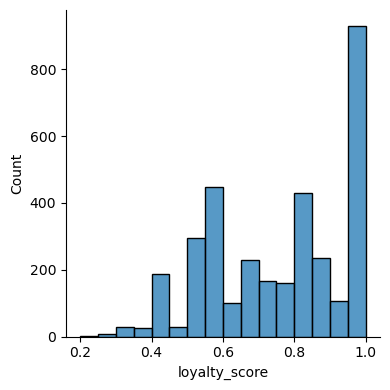

In [71]:
ax = sns.displot(loyalty_df.loyalty_score, height=4)

In [69]:
??sns.displot

In [72]:
loyalty_df.loyalty_score.median()

0.8

In [80]:
brands_loyalty = loyalty_df.groupby('fav_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'})

brands_loyalty

,fav_brand,loyalty_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5
5,Brand_7,0.444444,9
6,Store_Brand,0.750000,715


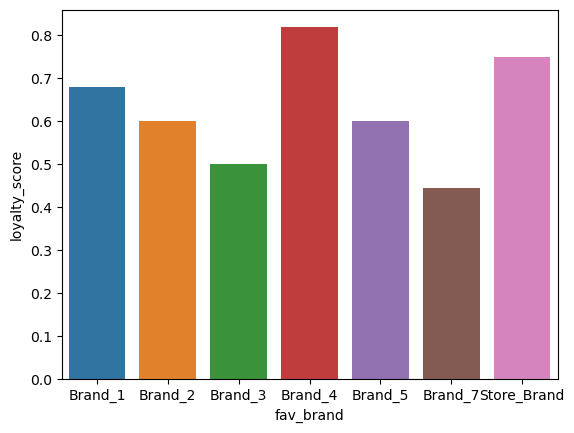

In [89]:
ax = sns.barplot(data=brands_loyalty, x="fav_brand", y="loyalty_score")

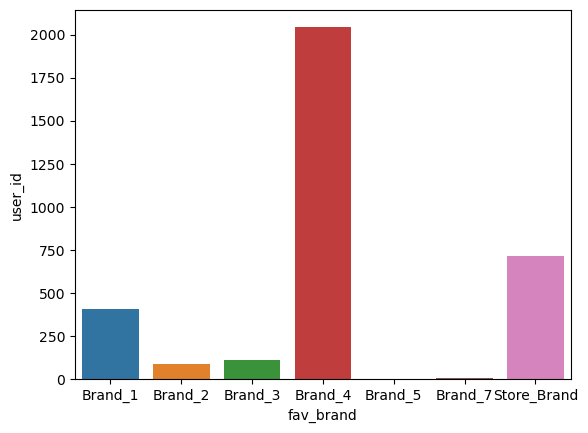

In [87]:
ax = sns.barplot(data=brands_loyalty, x="fav_brand", y="user_id")